In [3]:
include("../../startup.jl")

┌ Info: Recompiling stale cache file C:\Users\lucy_\.julia\compiled\v1.1\PGFPlotsX\ckKEQ.ji for PGFPlotsX [8314cec4-20b6-5062-9cdb-752b83310925]
└ @ Base loading.jl:1184


4-element Array{String,1}:
 "@"                                  
 "@v#.#"                              
 "@stdlib"                            
 "C:\\Users\\lucy_\\bats\\RoostFinder"

In [4]:
@load "shrink_bound.jld2" t_rt msds u0s x L

5-element Array{Symbol,1}:
 :t_rt
 :msds
 :u0s 
 :x   
 :L   

┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\radiotrack\jupyter\tmp.gif
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\radiotrack\\jupyter\\tmp.gif")
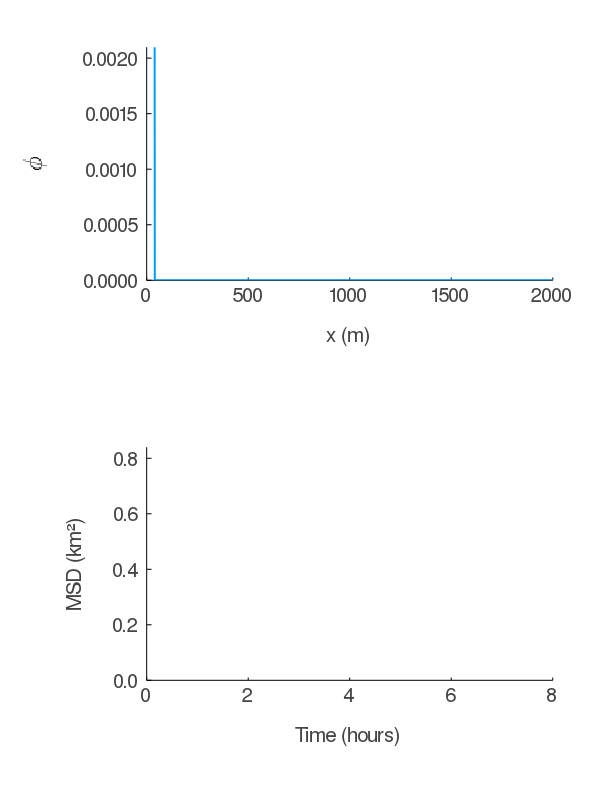

In [13]:
@gif for i = 1:300
    a = plot(x[1:length(u0s[i])],u0s[i], xlabel="x (m)", ylabel=L"\phi", legend=false, xlim=(0,L),ylim=(0,maximum(u0s[20])))
    b  = plot(t_rt[1:i]./3600, msds[1:i]./1e6, xlabel="Time (hours)",  ylabel="MSD (km²)", legend=false, xlim=(0,8), ylim=(0,maximum(msds)./1e6))
    plot(a,b, layout = @layout([a; b]), size = (600,800))
end

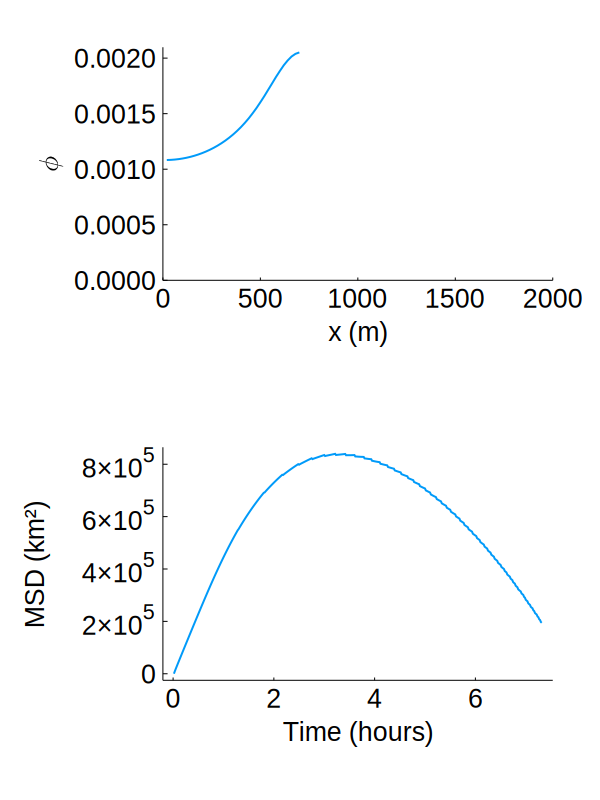

In [171]:
gr()
i = 439
a = plot(x[1:length(u0s[i])], u0s[i],  xlabel="x (m)", ylabel=L"\phi", legend=false, xlim=(0,L),ylim=(0,maximum(u0s[20])))
b = plot(t_rt[1:i]./3600, msds[1:i], xlabel="Time (hours)",  ylabel="MSD (km²)", legend=false);
plot(a,b, layout = @layout([a; b]), size = (600,800))

┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\radiotrack\figs\anim_fps15.gif
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\radiotrack\\figs\\anim_fps15.gif")
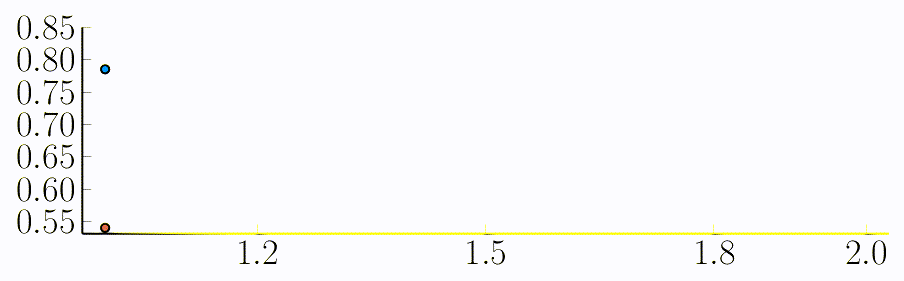

In [17]:
l = @layout([a; b])
p = plot(plot([sin, cos], 1, leg = false), scatter([atan, cos], 1, leg = false), layout = l)
anim = Animation()
for x = range(1, stop = 10π, length = 10)
    plot(push!(p, x, Float64[sin(x), cos(x), atan(x), cos(x)]))
    frame(anim)
end
mov(anim, "../figs/anim_fps15.gif", fps = 1)